In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Load Data
data_df = pd.read_csv('Crop-Data.csv')
data_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
#Descriptive Statistics
descriptive_stats = data_df.describe()
descriptive_stats.to_excel('Descriptive Statistics.xlsx')

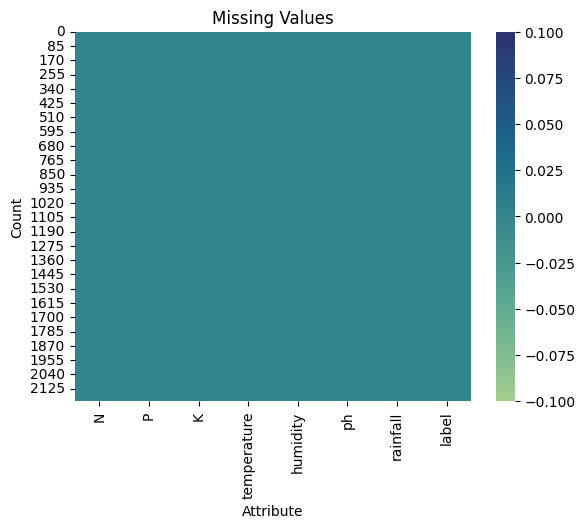

In [5]:
#Heatmap to identify missing values
sns.heatmap(data_df.isnull(), cmap="crest")
plt.title('Missing Values')
plt.ylabel('Count')
plt.xlabel('Attribute')
plt.show()

Text(0.5, 1.0, 'Count Plot')

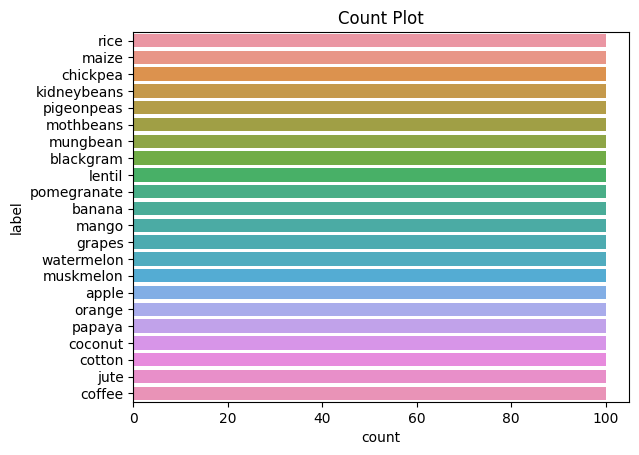

In [7]:
#Plot of the label count to identify inbalance
sns.countplot(y='label',data=data_df)
plt.title('Count Plot')

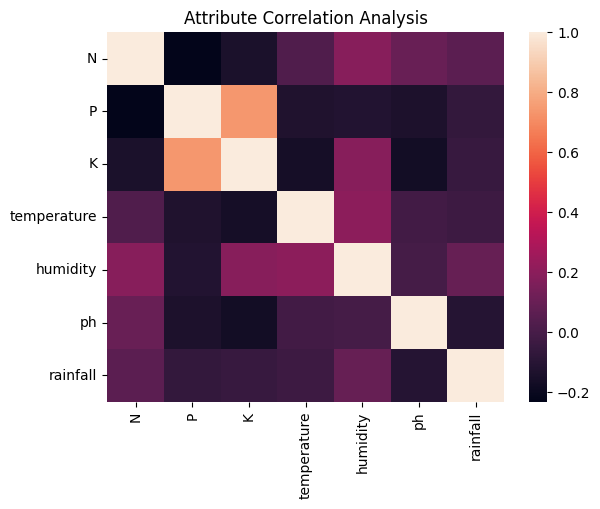

In [10]:
#Correlation Analysis
sns.heatmap(data_df[['N','P','K','temperature','humidity','ph','rainfall']].corr())
plt.title('Attribute Correlation Analysis')
plt.show()

In [ ]:
def preprocess(df):
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)
    return df

clean_df = preprocess(data_df)

train_df, test_df = train_test_split(clean_df, test_size=0.2, random_state=42)

train_df.to_csv('Train-Data.csv', index=False)
test_df.to_csv('Test-Data.csv', index=False)